<a href="https://colab.research.google.com/github/beniciowg/data-science-projects/blob/master/Credit_Card's_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card's Fraud Detection

<img src="https://docs.google.com/uc?export=download&id=1tnXd6F8zuCDaW2XVRzo_oc2z7kmjgWi6" width="100%">

Have you ever had your credit card blocked due to a fraud? Or perhaps it was blocked after a real transaction that you made? All of this happens thanks to the artificial intelligence's algorithms created to bring more security and reliability to financial transactions.

Only in 2019, the artificial intelligence has prevented circa 2 billion dollars in frauds in Latin America and Caribe. Furthermore, in Brazil, circa 12,1 million people have been victims of some kind of financial fraud in the last year, resulting in a loss of R$ 1,8 billion.

Due to all these numbers, financial frauds have been a great concern of financial institutions as banks and fintechs, which have been investing in Data Science and Artificial Intelligence to improve the algorithms' correctness. With large databases of financial transactions history, a machine learning algorithm that improves even a bit these predictions can result in millions of dollars saved.

In this notebook, we are going through all the steps of a data science project as obtaining the data, exploratory analysis, data preparation and, finally, building the machine learning algorithms. We will compare three different classification algorithms to see which one has the best evaluation. The algorithms we are going to use are Logistic Regression, Decision Tree and XGBoost.


## Importing the Data

The data used in this project were made available by some european credit card companies during a research collaboration of [Worldline and the Machine Learning Group](http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection and [can be found in Kaggle](https://www.kaggle.com/mlg-ulb/creditcardfraud). The dataset contains financial operations that happened in a period of 2 days in September of 2013, where 492 operations were classified as frauds of a total of 290 thousand.

As we can see, the dataset is highly imbalanced, with fraudulent transactions representing only 0,172% of the total. Besides that, due to privacy and security issues, all features were uncharacterized and are numeric. So, the columns are represented as $[V1, V2, V3 \dots, V28]$ as a result of the PCA (Principal Component Analysis) transformation.

PCA is a method that can be used for dimensionality reduction. It reduces the number of features keeping the most amount of information possible by finding a new group of resources called *components*.


In [1]:
#@title
!pip install scikit-plot -q

In [24]:
# import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('dark')

# import the data into a pandas dataframe
file_path = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"
df = pd.read_csv(file_path)

## Exploratory Data Analysis (EDA)

Before building the machine learning models, it is important to explore our dataframe to understand it better, see how the features' distributions are and see which insights we can get about it.

In order to do that, we will check the first entries, build a statistical summary of the dataframe, look for missing values and check the features' distributions and correlations.


In [3]:
# check the first 5 entries
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# check all the columns names and types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

We can see that all our features have numeric values, and that all the features resulted from the PCA transformation were also normalized (subtracted from the mean and divided by the standard deviation). Furthermore, we have two features that didn't went through the PCA transformation: `Time` and `Amount`. The `Time` feature represents the seconds elapsed between each transaction and the first transaction in the dataset, while `Amount` is the transaction amount. The `Class` feature tells if that transaction was regular (0) or if it was a fraud (1) and is our target column, the one we are going to build the machine learning algorithms to predict. Lastly, it is also possible to check that our dataset doesn't have null values. 

In [5]:
# creating the statistical summary
df.describe().round(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00,284807.00
mean,94813.86,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,88.35,0.00
std,47488.15,1.96,1.65,1.52,1.42,1.38,1.33,1.24,1.19,1.10,1.09,1.02,1.00,1.00,0.96,0.92,0.88,0.85,0.84,0.81,0.77,0.73,0.73,0.62,0.61,0.52,0.48,0.40,0.33,250.12,0.04
min,0.00,-56.41,-72.72,-48.33,-5.68,-113.74,-26.16,-43.56,-73.22,-13.43,-24.59,-4.80,-18.68,-5.79,-19.21,-4.50,-14.13,-25.16,-9.50,-7.21,-54.50,-34.83,-10.93,-44.81,-2.84,-10.30,-2.60,-22.57,-15.43,0.00,0.00
25%,54201.50,-0.92,-0.60,-0.89,-0.85,-0.69,-0.77,-0.55,-0.21,-0.64,-0.54,-0.76,-0.41,-0.65,-0.43,-0.58,-0.47,-0.48,-0.50,-0.46,-0.21,-0.23,-0.54,-0.16,-0.35,-0.32,-0.33,-0.07,-0.05,5.60,0.00
50%,84692.00,0.02,0.07,0.18,-0.02,-0.05,-0.27,0.04,0.02,-0.05,-0.09,-0.03,0.14,-0.01,0.05,0.05,0.07,-0.07,-0.00,0.00,-0.06,-0.03,0.01,-0.01,0.04,0.02,-0.05,0.00,0.01,22.00,0.00
75%,139320.50,1.32,0.80,1.03,0.74,0.61,0.40,0.57,0.33,0.60,0.45,0.74,0.62,0.66,0.49,0.65,0.52,0.40,0.50,0.46,0.13,0.19,0.53,0.15,0.44,0.35,0.24,0.09,0.08,77.16,0.00
max,172792.00,2.45,22.06,9.38,16.88,34.80,73.30,120.59,20.01,15.59,23.75,12.02,7.85,7.13,10.53,8.88,17.32,9.25,5.04,5.59,39.42,27.20,10.50,22.53,4.58,7.52,3.52,31.61,33.85,25691.16,1.00


0    284315
1       492
Name: Class, dtype: int64
The percentage of fraudulent transactions is: 0.173%


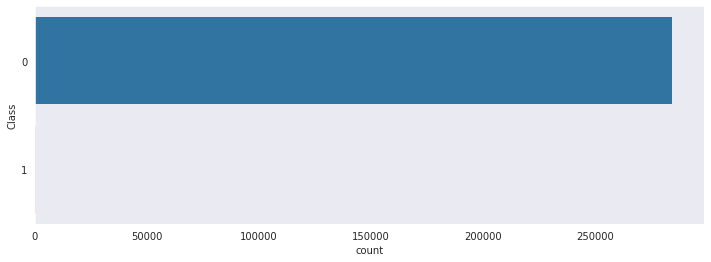

In [6]:
# making a countplot to see how many entries of each class we have
print(df.Class.value_counts())
print(f'The percentage of fraudulent transactions is: {round((df[df.Class == 1].shape[0]/df.shape[0])*100, 3)}%')

fig, ax = plt.subplots(figsize=(12, 4))

sns.countplot(y=df.Class, orient='h', linewidth=0)

plt.show()

With the statistical summary obtained with the method `describe()` and the countplot for the `Class` feature we can check some things:
* It is possible to confirm that we don't have issues with the features of the PCA transformation;
* We can confirm the great imbalance between the positive (1) and the negative (0) labels of the `Class` feature, the positive class is almost unnoticeable in the countplot;
* Regarding the `Amount` feature we can notice that while the median is 22, the mean is 88.35 and the maximum value is 25691.16, indicating a great concentration of numbers in the lowest values.

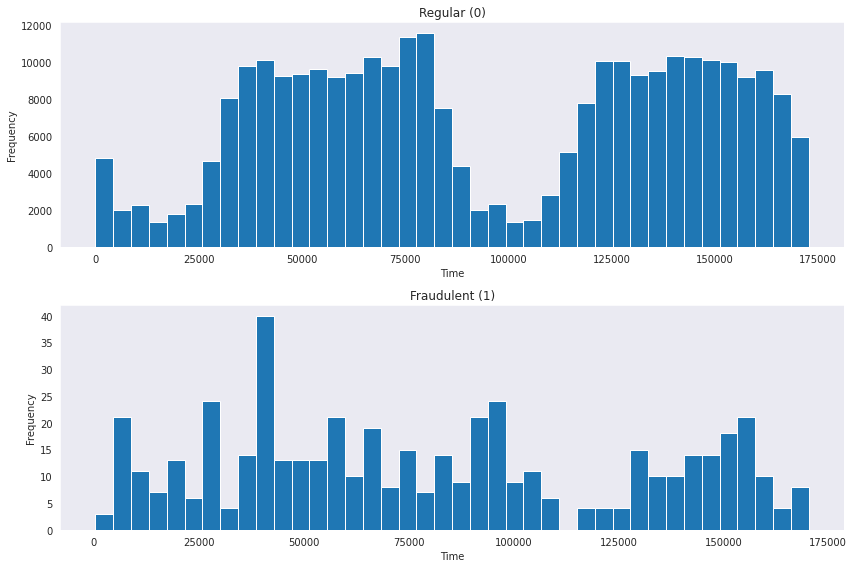

In [7]:
# building histograms for the time feature for both classes
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,8))

bins = 40

ax1.hist(df[df.Class == 0].Time, bins=bins)
ax1.set_title('Regular (0)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Frequency')

ax2.hist(df[df.Class == 1].Time, bins=bins)
ax2.set_title('Fraudulent (1)')
ax2.set_xlabel('Time')
ax2.set_ylabel('Frequency')

plt.tight_layout()

Through the histogram plotted, it is possible to notice that for the `Time` feature, there are not great differences between the distributions of the two classes. One thing that could be highlighted is that in the end of the first day and the beggining of the second (75000 to 100000 seconds), while the regular transactions fall greatly, the fraudulent ones have some peaks. However, due to the great disparity between the frequency of the two classes, there are still a lot more of regular transactions during that period of time.

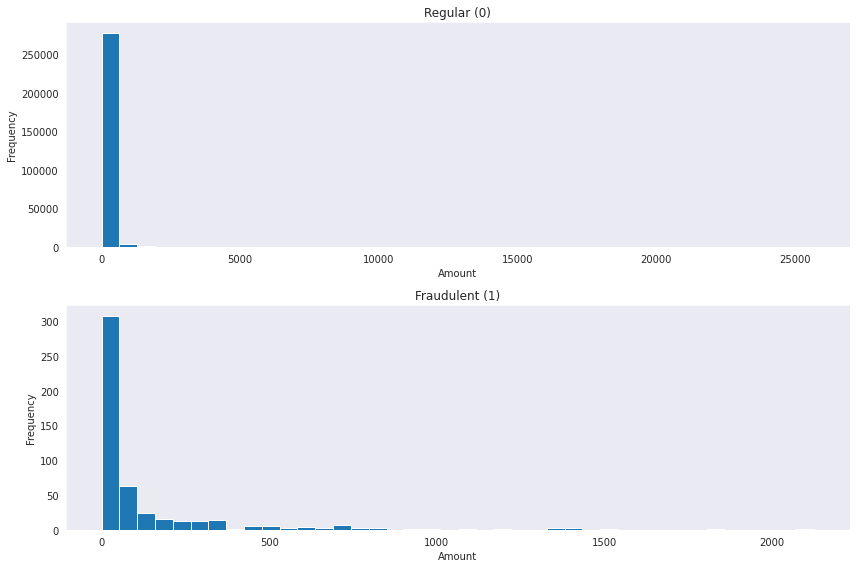

In [8]:
# building histograms for the amount feature for both classes
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(12,8))

bins = 40

ax1.hist(df[df.Class == 0].Amount, bins=bins)
ax1.set_title('Regular (0)')
ax1.set_xlabel('Amount')
ax1.set_ylabel('Frequency')

ax2.hist(df[df.Class == 1].Amount, bins=bins)
ax2.set_title('Fraudulent (1)')
ax2.set_xlabel('Amount')
ax2.set_ylabel('Frequency')

plt.tight_layout()

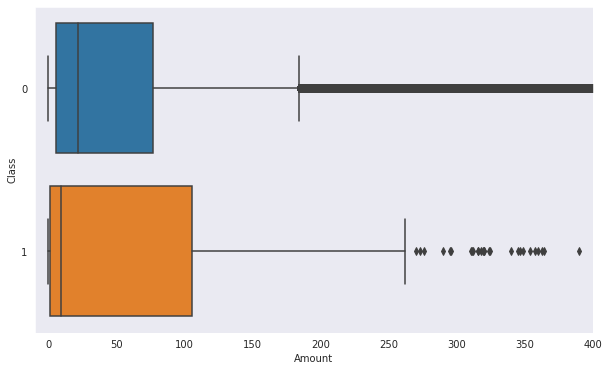

Standard Deviation for regular transactions (Class 0): 250.1
Standard Deviation for fraudulent transactions (Class 1): 256.4


In [9]:
# building a boxplot of the amount feature for both classes
fig, ax = plt.subplots(figsize=(10,6))

sns.boxplot('Amount', 'Class', data=df, orient='h')
ax.set_xlim(left=-10, right=400,)

plt.show()

# Calculating the std for amount for both classes
print(f'Standard Deviation for regular transactions (Class 0): {round(np.std(np.array(df[df.Class == 0].Amount)), 1)}')
print(f'Standard Deviation for fraudulent transactions (Class 1): {round(np.std(np.array(df[df.Class == 1].Amount)), 1)}')

Analyzing the histogram and the boxplot for the `Amount` feature and calculating the standard deviation for each class, we can see that the amounts of the fraudulent transactions have a greater standard deviation. This indicates they have higher frequencies in extremes values, what shall be important for our machine learning algorithms.

Let's check the distributions of the other features for each class.

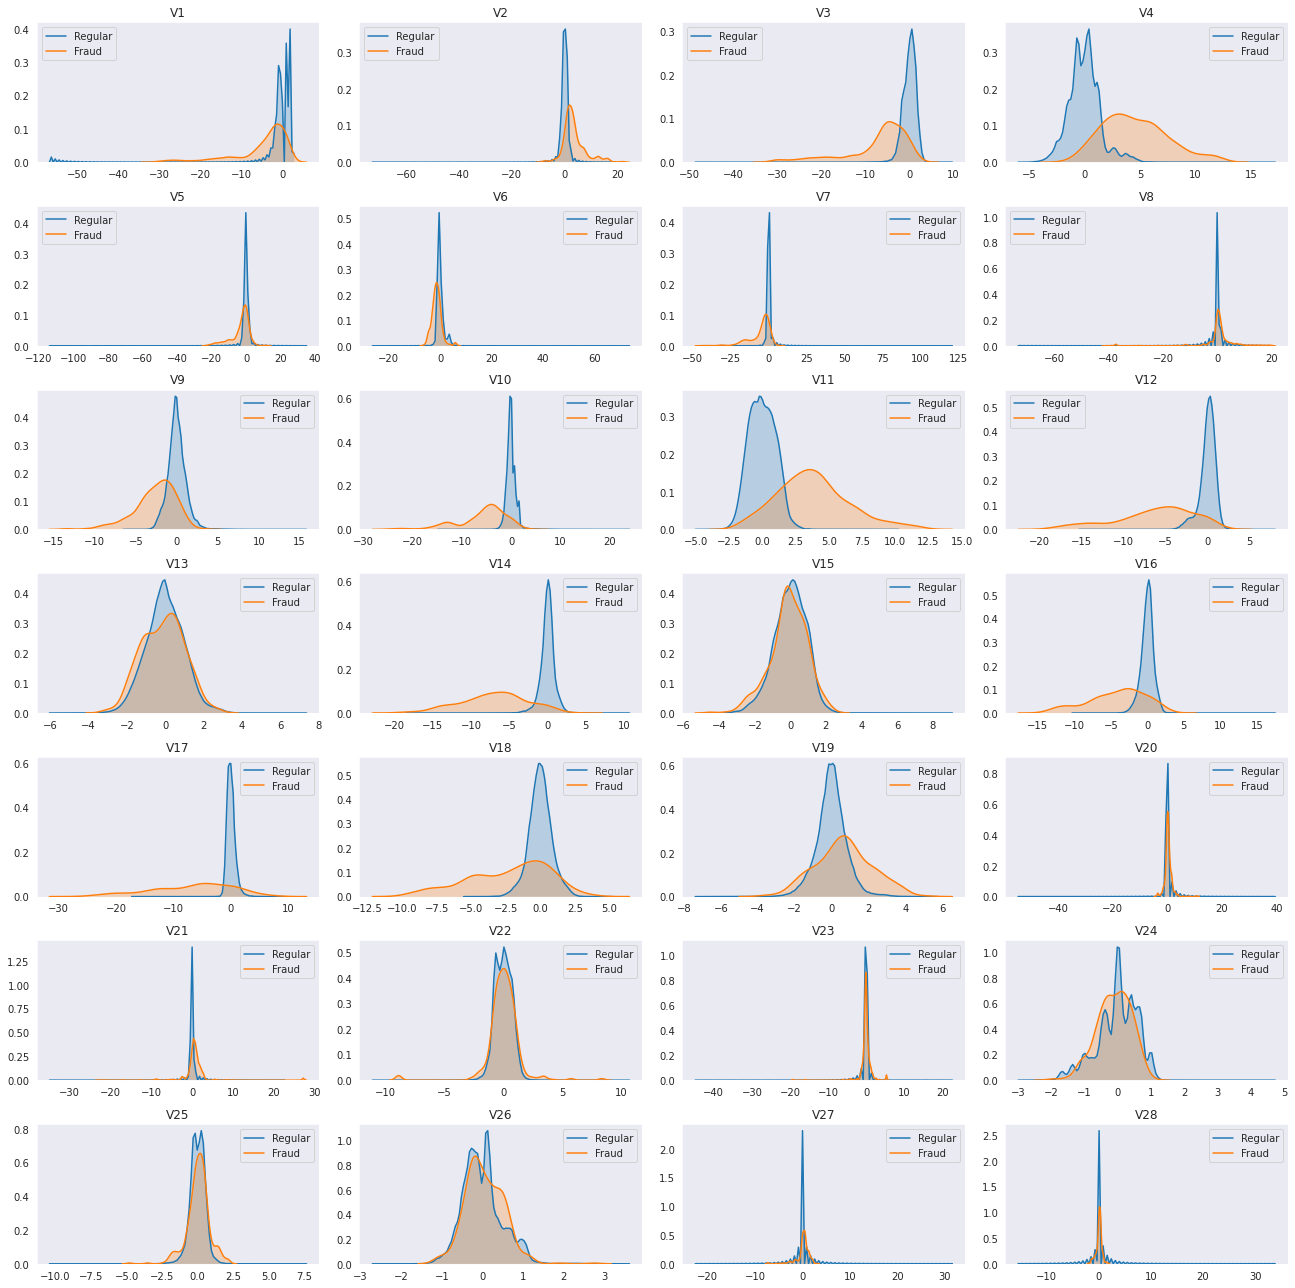

In [10]:
# plotting the distributions for the other features
columns = df.drop(['Time', 'Amount', 'Class'], axis=1).columns
df_regular = df[df.Class == 0]
df_fraud = df[df.Class == 1]
i = 0

fig, ax = plt.subplots(nrows=7, ncols=4, figsize=(18,18))

for column in columns:
  i += 1
  plt.subplot(7, 4, i)
  sns.kdeplot(df_regular[column], label='Regular', shade=True)
  sns.kdeplot(df_fraud[column], label='Fraud', shade=True)
  plt.title(column)
  
plt.tight_layout()

Through the plotted distributions, we can see that features like $V8, V13$ and $V15$ probably won't be so important for the predictions as features like $V4, V11$ and $V14$. This happens because it is easier to predict a class based on features that aren't so close to each other and behave differently.

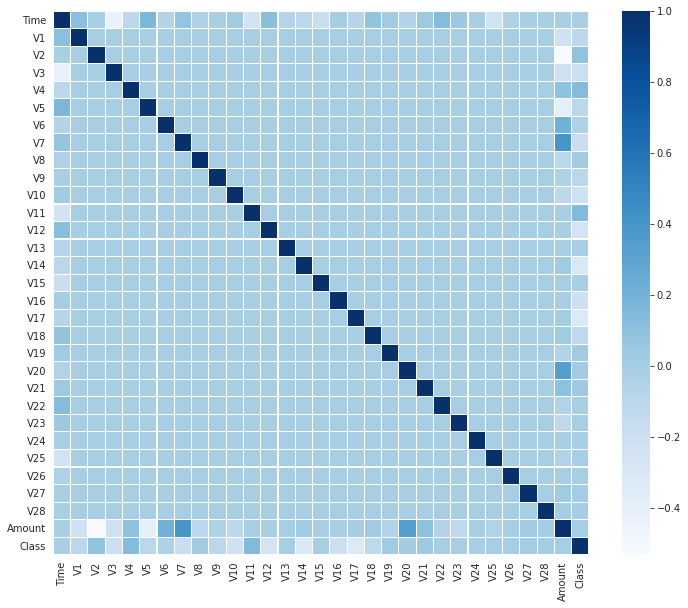

In [11]:
# plotting a heatmap with the correlation matrix
fig, ax = plt.subplots(figsize=(12,10))

corrMatrix = df.corr()
sns.heatmap(data=corrMatrix, linewidths=.1, cmap='Blues')

plt.show()

We can notice that there is no linear correlation that can be highlighted from our heatmap. This can be happening due to the imbalanced classes, further we will check the correlations again after preparing our data to run the machine learning algorithms.

## Data Preparation

In order to our machine learning algorithms perform better, we are going to standardize the `Time` and `Amount` features so they are in the same scale as the others. This is an important step, because if a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function and make the estimator unable to learn from other features correctly as expected [1]. This means that a feature with higher values could receive more importance from our models compared to features with lower values, even if it wasn't true.

The formula to realize this standardization consists in subtracting each value of the feature by its mean and dividing by the standard deviation, as we can see below [1]:

$$z = \frac{x - u}{s}$$

Where `u` is the mean of the feature and `s` its standard deviation.

In [12]:
# importing the scaler from scikit-learn and instantiating it
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [13]:
# creating a copy of the dataset to make the changes
df_clean = df.copy()

# creating new columns for the scaled features
df_clean['scaled_Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df_clean['scaled_Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# dropping the old columns 
df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_Time,scaled_Amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-1.996583,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-1.996583,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-1.996562,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-1.996562,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-1.996541,-0.073403


We can see that two new columns were created with the standardized values for `Time` and `Amount` and the old ones were deleted from the copy of the original dataset.

### Train and Test Split

Now we are going to split our data into the features that will be used to make the predictions (X) and the target feature (y). After that, we must split our data in the training set and testing set, which will be used for our models' evaluation.

In [14]:
# importing the function to split our data into train and test
from sklearn.model_selection import train_test_split

In [15]:
# splitting the target feature from the others
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y)

### Undersampling

Now that we have split our data, we will deal with our imbalance problem. One of the methods to do this is the Undersampling.

Undersampling consists in preserving all the entries of the positive class (fraudulent transactions in this case) and randomly select entries of the negative class (regular transactions in this case) in the same quantity as the positive class. The advantage of this tecnique is that there are no changes in the positive class. However, the biggest concern in using it is the great loss of information from the negative class.

We must take care to always split our data into train and test before realizing the undersampling, else we can "leak" data from our training set into our testing set and overfit our model.

In [16]:
# importing the class of undersampling from the imblearn library
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


1    367
0    367
dtype: int64


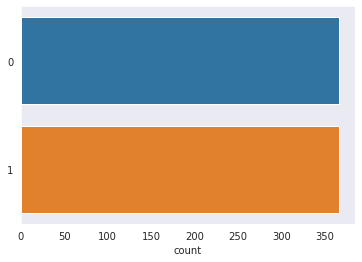

In [17]:
# applying the undersampler to our training set
X_rus, y_rus = rus.fit_sample(X_train, y_train);

# checking the results
print(pd.Series(y_rus).value_counts());

sns.countplot(y=y_rus, orient='h');

We can see that now we have the same number of entries to train our model for both the negative and the positive classes. An interesting thing to check is the correlation between our features now that our data is balanced.

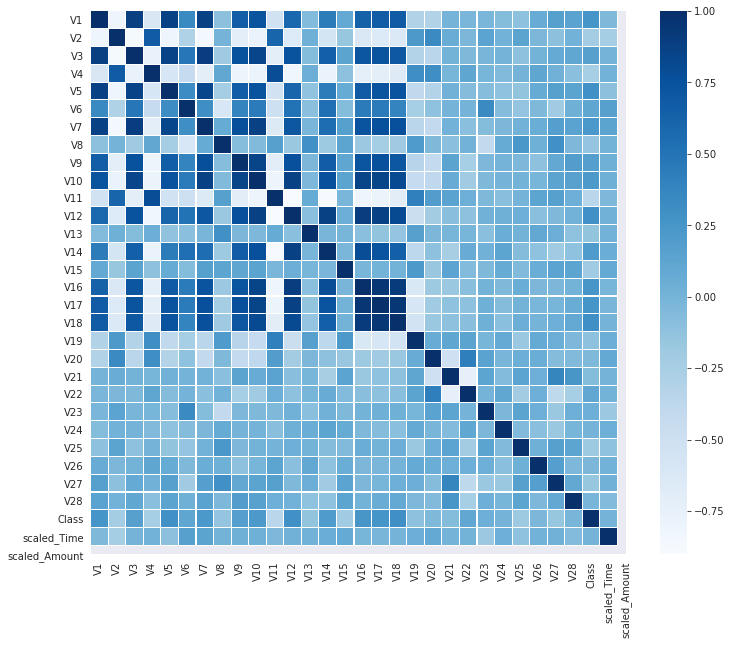

In [18]:
# creating the heatmap for the new correlation matrix
fig, ax = plt.subplots(figsize=(12,10))

corrMatrix = pd.DataFrame(X_rus).corr()
sns.heatmap(data=corrMatrix, linewidths=.1, 
            xticklabels=df_clean.columns, yticklabels=df_clean.columns,
            cmap='Blues')

plt.show()

With our data balanced, it is possible to notice greater correlation between our features.

## Machine Learning Models

In order to achieve better results for our classification, we are going to build three different models: Logistic Regression, Decision Tree and XGBoost and evaluate each one of them. We need to have in mind that our goal is to predict as many frauds as possible and don't classify wrongly a regular transaction as fraud.

First of all, let's understand better our evaluation methods.

In [19]:
# importing our models and the evaluation metrics
import scikitplot as skplt
from sklearn.metrics import auc, classification_report, confusion_matrix, precision_recall_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

### Confusion Matrix

A confusion matrix is great to identify where our model is performing well and where it is making most mistakes. The rows in our confusion matrix are the true labels of the testing set and the columns are the predicted labels. So, we can check the numbers of True Positives, True Negatives, False Positives and False Negatives, as we can see in the image below [2].

<p align=center>
<img src="https://2.bp.blogspot.com/-EvSXDotTOwc/XMfeOGZ-CVI/AAAAAAAAEiE/oePFfvhfOQM11dgRn9FkPxlegCXbgOF4QCLcBGAs/s1600/confusionMatrxiUpdated.jpg" width="75%"></p>
<p align=center> Image taken from: https://bit.ly/2VQ2HrR </p>

### Accuracy

Accuracy is the most simple score to evaluate machine learning models, it simply sums the correct predictions and divides by all the predictions. It isn't recommended for imbalanced data, because the great number of correct predictions of the negative class will make the accuracy high, even if we have a lot of wrong predictions for the positive class [3].

$$ACC = \frac{TP + TN}{TP + FP + TN + FN}$$

### F1 Score and Precision-Recall Curve

Precision is the number of true positives divided by the sum of the true positives and false positives. It describes how good a model is at predicting the positive class [3].

$$Precision = rac{TP}{TP + FP}$$

Recall is the ratio of the number of true positives divided by the sum of the true positives and the false negatives. It indicates if the positive class (1) is being predicted correctly. Recall is also known as sensitivity [3].

$$Recall = \frac{TP}{TP + FN}$$

Precision and Recall are useful for imbalanced datasets, because they don't involve the true negatives. They are only concerned with the correct prediction of the positive class (1) [3].

The F1 Score is the harmonic mean of Precision and Recall (harmonic mean because they are rates), so it combines both in one metric. It is largely used in analysis focused on the positive class (1) and imbalanced data [3].

$$F1 = 2*\frac{Precision*Recall}{Precision + Recall}$$

A precision-recall curve is a plot of the precision (y-axis) and the recall (x-axis) for different thresholds (probability that an instance must achieve to be classified as positive class) [3].

So, while F1 Score summarizes model skill for a specific probability threshold (e.g. 0.5), we can calculate the area under curve (AUC) to summarize the skill of a model across thresholds [3].

To have a better understanding, let's take our dataset as an example. In general, an instance would be classified as fraud (1), if its probability (P(1)) of being a fraud was higher than 0.5 (P(1) > 0.5), which is our threshold value. For this value, we get a Recall-Precision pair based on the True Positives, True Negatives, False Positives and False Negatives [4].

Now, if we change our 0.5 threshold, we shall get a different result (different pair). We can already classify a transaction as fraud for P(1) > 0.4. This will decrease Precision and increase Recall. We would rather classify a transaction as fraud even though it is not, to make sure that fraudulent transactions are classified as so. This represents the trade-off between Precision and Recall [4].

### Logistic Regression

Logistic Regression is a machine learning algorithm used for classification problems. It uses the sigmoid function to transform its output and return a probability. As we have seen, if this probability is higher than the threshold, the instance will be classified as positive class (1), otherwise, it will be classified as negative class (0) [5].

              precision    recall  f1-score   support

           0       1.00      0.97      0.98     71077
           1       0.05      0.96      0.09       125

    accuracy                           0.97     71202
   macro avg       0.52      0.96      0.54     71202
weighted avg       1.00      0.97      0.98     71202

AUC: 0.77


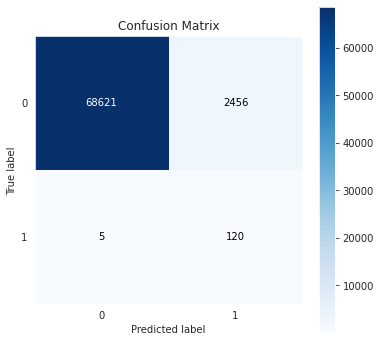

In [20]:
# instantiating our model and fitting it to our data
lr = LogisticRegression()
lr.fit(X_rus, y_rus)

# predicting the outputs for the testing set
lr_pred = lr.predict(X_test)
lr_prob = lr.predict_proba(X_test)

# calculating the precision-recall curve
precision, recall, threshold = precision_recall_curve(y_test, lr_prob[:, 1])

# displaying our evaluation scores
print(classification_report(y_test, lr_pred))
print(f'AUC: {round(auc(recall, precision), 2)}')

skplt.metrics.plot_confusion_matrix(y_test, lr_pred, figsize=(6,6));

We can see that despite the accuracy is high (0.97), our F1 Score is very low (0.09). It is explained by the low Precision score we got (0.05), as we can check in the confusion matrix, we are predicting a lot of regular transactions as frauds (False Positive).

Our Recall score is high (0.96), which means the fraudulents transactions are being predicted correctly, but the trade off between Precision and Recall isn't appropriate.

### Decision Tree
Decision trees are tools used to support decisions using a flowchart-like structures. It makes the decisions clear where each internal node represents a test on an attribute (feature), each branch represents the outcome of the test, and each leaf node represents the class label, the decision taken after computing all attributes [6].

In machine learning algorithms, the decision tree is used to calculate the probability of a record belonging to each class or, to classify the record by assigning it to the most likely class [6]. Below is the example of the tree generated by algorithm used in our dataset. As we have guessed by looking at our distributions, $V14$ is one of the most important features as it is the first feature tested by our decision tree.

<img src="https://docs.google.com/uc?export=download&id=1wbJ9VDdMGeJrE0c2wq2FATtDkwSlNm0w" width="100%">




              precision    recall  f1-score   support

           0       1.00      0.90      0.95     71077
           1       0.02      0.94      0.03       125

    accuracy                           0.90     71202
   macro avg       0.51      0.92      0.49     71202
weighted avg       1.00      0.90      0.94     71202

AUC: 0.48


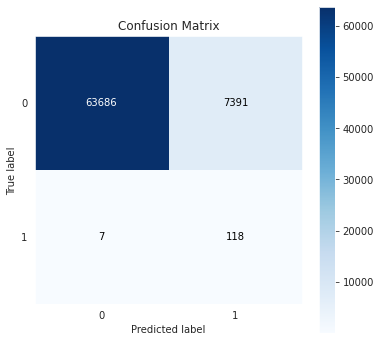

In [21]:
# instantiating our model and fitting it to our data
dt = DecisionTreeClassifier()
dt.fit(X_rus, y_rus)

# predicting the outputs for the testing set
dt_pred = dt.predict(X_test)
dt_prob = dt.predict_proba(X_test)

# calculating the precision-recall curve
precision, recall, threshold = precision_recall_curve(y_test, dt_prob[:, 1])

# displaying our evaluation scores
print(classification_report(y_test, dt_pred))
print(f'AUC: {round(auc(recall, precision), 2)}')
skplt.metrics.plot_confusion_matrix(y_test, dt_pred, figsize=(6,6));

In [ ]:
#@title
# importar bibliotecas
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# criar DOT 
dot = export_graphviz(dt, filled=True, rounded=True,
                      feature_names=X.columns, class_names=['Regular', 'Fraud'])

# plotar
graph = pydotplus.graph_from_dot_data(dot)  
Image(graph.create_png())

We can see that the decision tree model performed worse than the Logistic Regression in all scores. It had the same trouble as the previous model, which was predicting a lot of False Positives.

### XGBoost

XGBoost is a scalable machine learning system for tree boosting that is capable of capturing the patterns within the data and scaling to handle immense quantities of data. It yields state-of-the-art results on a wide range of problems. What distinguishes XGBoost from other machine learning model variants is its scalability, and ability to run greater than 10X faster than existing solutions.

One important detail is that we won't use the undersampled training set, but rather with all of our training set. The XGBoost model already deals with the imbalanced data [7].

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71077
           1       0.93      0.81      0.86       125

    accuracy                           1.00     71202
   macro avg       0.96      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202

AUC: 0.89


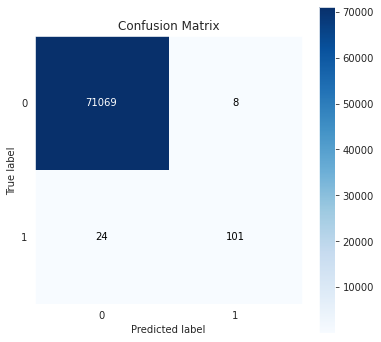

In [22]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

xgb_pred = xgb.predict(X_test)
xgb_prob = xgb.predict_proba(X_test)

precision, recall, threshold = precision_recall_curve(y_test, xgb_prob[:, 1])

print(classification_report(y_test, xgb_pred))
print(f'AUC: {round(auc(recall, precision), 2)}')
skplt.metrics.plot_confusion_matrix(y_test, xgb_pred, figsize=(6,6));

Our XGBoost model performed far better than the other two regarding the precision, even though its recall score was a bit lower. It showed a very high accuracy (1), a F1 Score of 0.86 and an AUC of 0.89, which were the best between the three.




### Comparing the Scores

Let's put the scores obtained in our models in a table for a better comparison.

In [30]:
table = pd.DataFrame(data={
    'scores': ['Accuracy', 'F1 Score', 'Precision', 'Recall', 'AUC'],
    'Logistic Regression': [0.97, 0.09, 0.05, 0.96, 0.77],
    'Decision Tree': [0.90, 0.03, 0.02, 0.94, 0.48],
    'XGBoost': [1.00, 0.86, 0.93, 0.81, 0.89]
})

table.index = table['scores']
table.drop('scores', axis=1, inplace=True)

table

,Logistic Regression,Decision Tree,XGBoost
scores,,,
Accuracy,0.97,0.90,1.00
F1 Score,0.09,0.03,0.86
Precision,0.05,0.02,0.93
Recall,0.96,0.94,0.81
AUC,0.77,0.48,0.89


So, if we had to choose between these three models, we probably would go with the XGBoost. Even though we wouldn't predict as many frauds, we wouldn't be bothering a lot of our clients with regular transactions being blocked as if they were frauds, the precision-recall trade-off was the best for this model.

## Conclusion

In this notebook we went through a lot of steps of a data science project:
* We checked our entries and saw that there were no null values and that we had a huge imbalance in the target feature;
* We saw which features had the most different distributions for each class and thus would be more important for our models;
* We standardized our data and compared the correlation between the features of the raw dataset and the balanced one;
* We understood the evaluation methods and used them to compare our models.

At the end, we decided that the XGBoost would be the way-to-go model, because it presented the best trade-off between precision and recall, besides having the highest AUC score for the precision-recall curve.

I hope you learned a lot reading this notebook and understood how machine learning can be used to prevent frauds in financial transactions. The models we used here surely have room for improvements, we could, for example, have tested other methods to deal with imbalanced data as Oversampling and SMITE and/or used Cross-validation and Grid Search to tune our models' hyperparameters.

# References

[1] https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

[2] https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62

[3] https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/ 

[4] https://stackoverflow.com/questions/46224752/what-is-a-threshold-in-a-precision-recall-curve#:~:text=Precision%2DRecall%20Curves%3A&text=Your%20predictions%20are%20based%20on,0.5%20(your%20threshold%20value).&text=This%20represents%20the%20intuitive%20trade,Recall%20or%20Sensitivity%20and%20Specificity.

[5] https://towardsdatascience.com/introduction-to-logistic-regression-66248243c148

[6] https://medium.com/greyatom/decision-trees-a-simple-way-to-visualize-a-decision-dc506a403aeb

[7]  https://machinelearningmastery.com/xgboost-for-imbalanced-classification/ 
